In [90]:
# importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
pwd = os.getcwd()

df = pd.read_csv(pwd + '/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [92]:
# create a number of varaibles and lists to manage the different features/variables
target = 'expenses'
categories = ['sex', 'smoker', 'region']
continuous = ['age', 'bmi', 'children']
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [93]:
# replace smoker varaibles
# first we check all unique values
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [94]:
# convert smoker varaible to binary
df['smoker'] = df['smoker'].map({'yes': True, 'no': False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


In [95]:
# convert data type of sex and region to category
df['sex'] = df.loc[:, 'sex'].astype('category')
df['region'] = df.loc[:, 'region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   bool    
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: bool(1), category(2), float64(2), int64(2)
memory usage: 46.2 KB


# Data Exploration

In [96]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Text(0.5, 0, 'expenses')

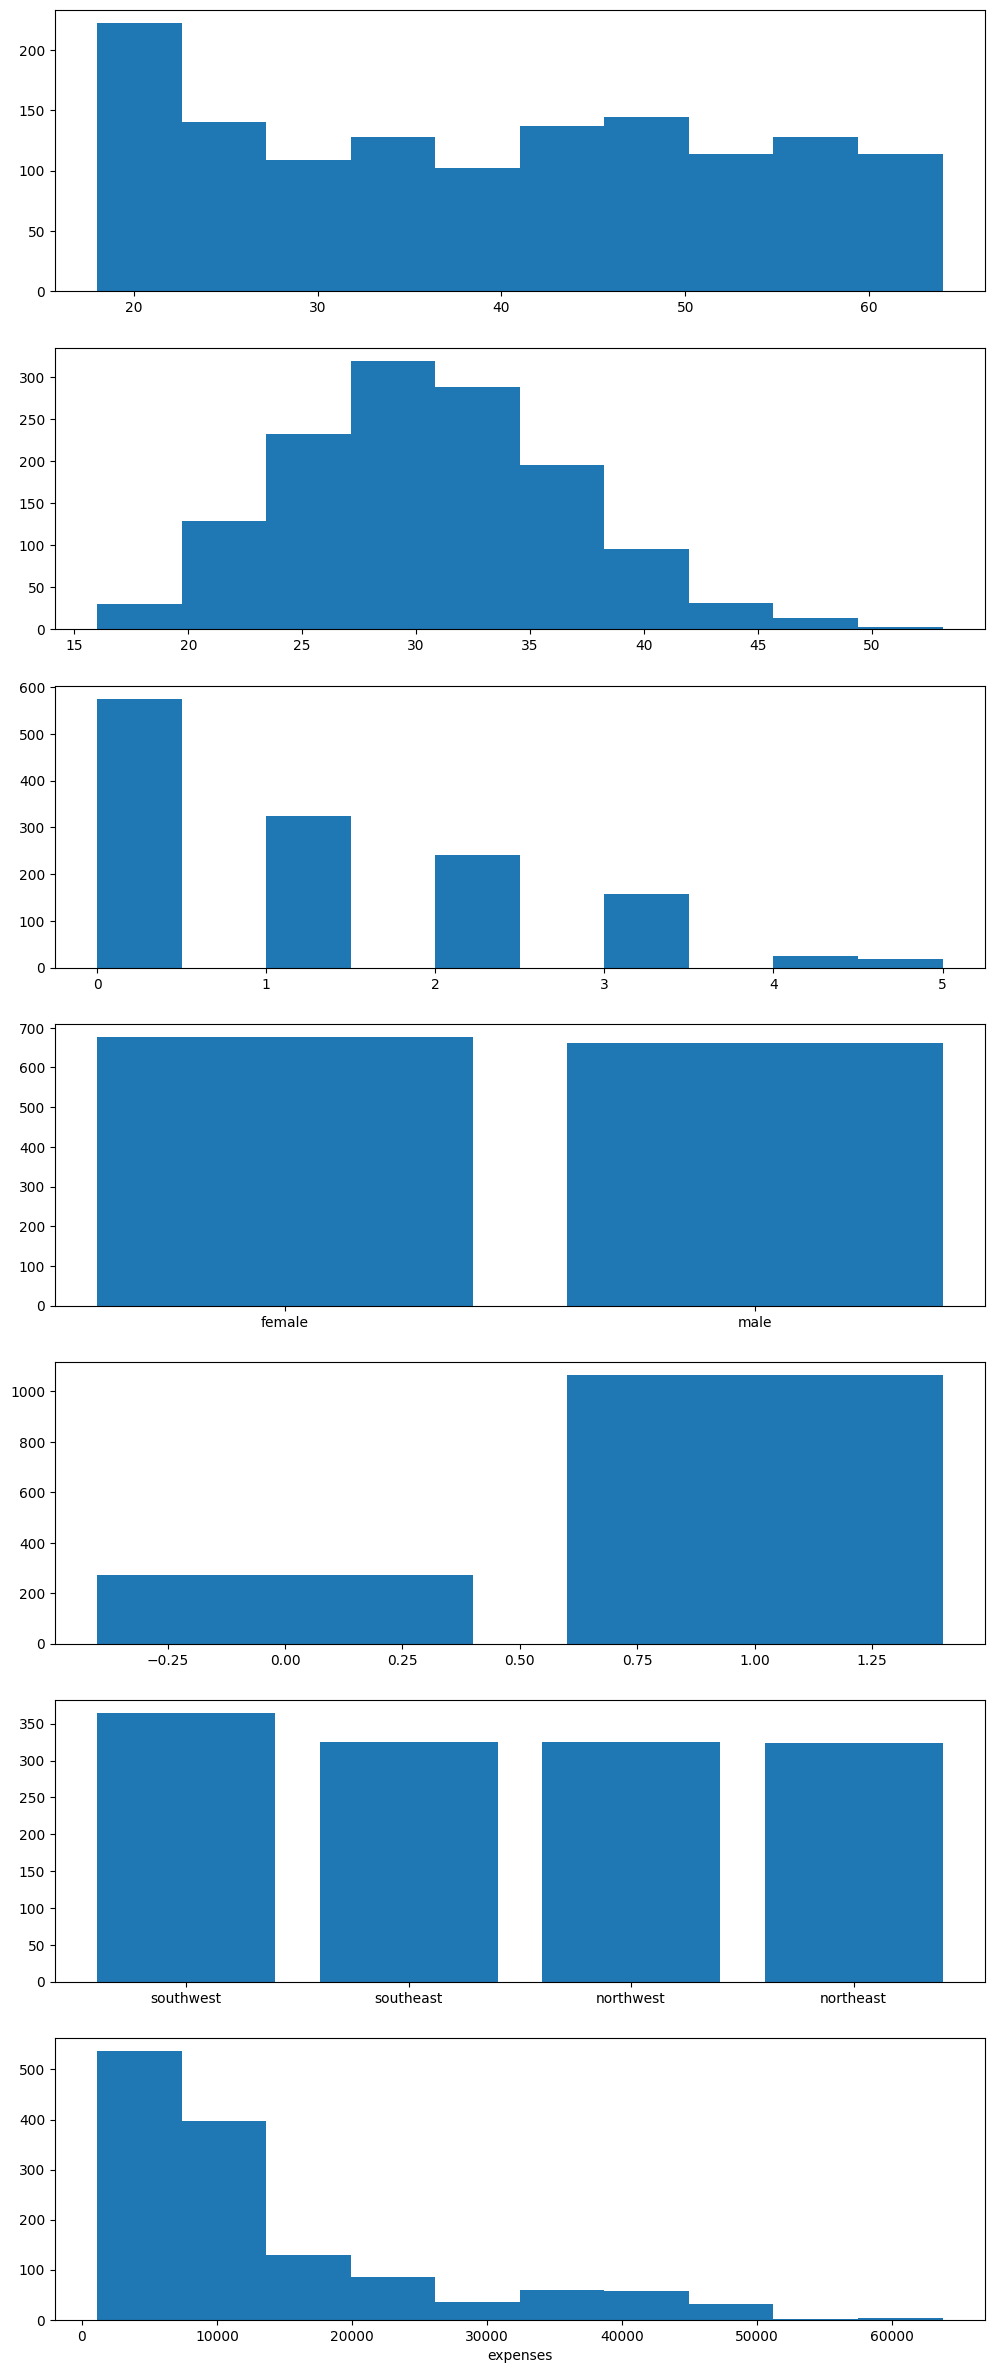

In [97]:
# visual analysis
fig, ax = plt.subplots(df.columns.size, 1, figsize=(12, 30))

i = 0
for column in continuous:
    ax[i].hist(df[column])
    i += 1
    
for column in categories:
    ax[i].bar(df[column].unique(), df[column].value_counts())
    i += 1
    
ax[i].hist(df[target])
ax[i].set_xlabel(target)


C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

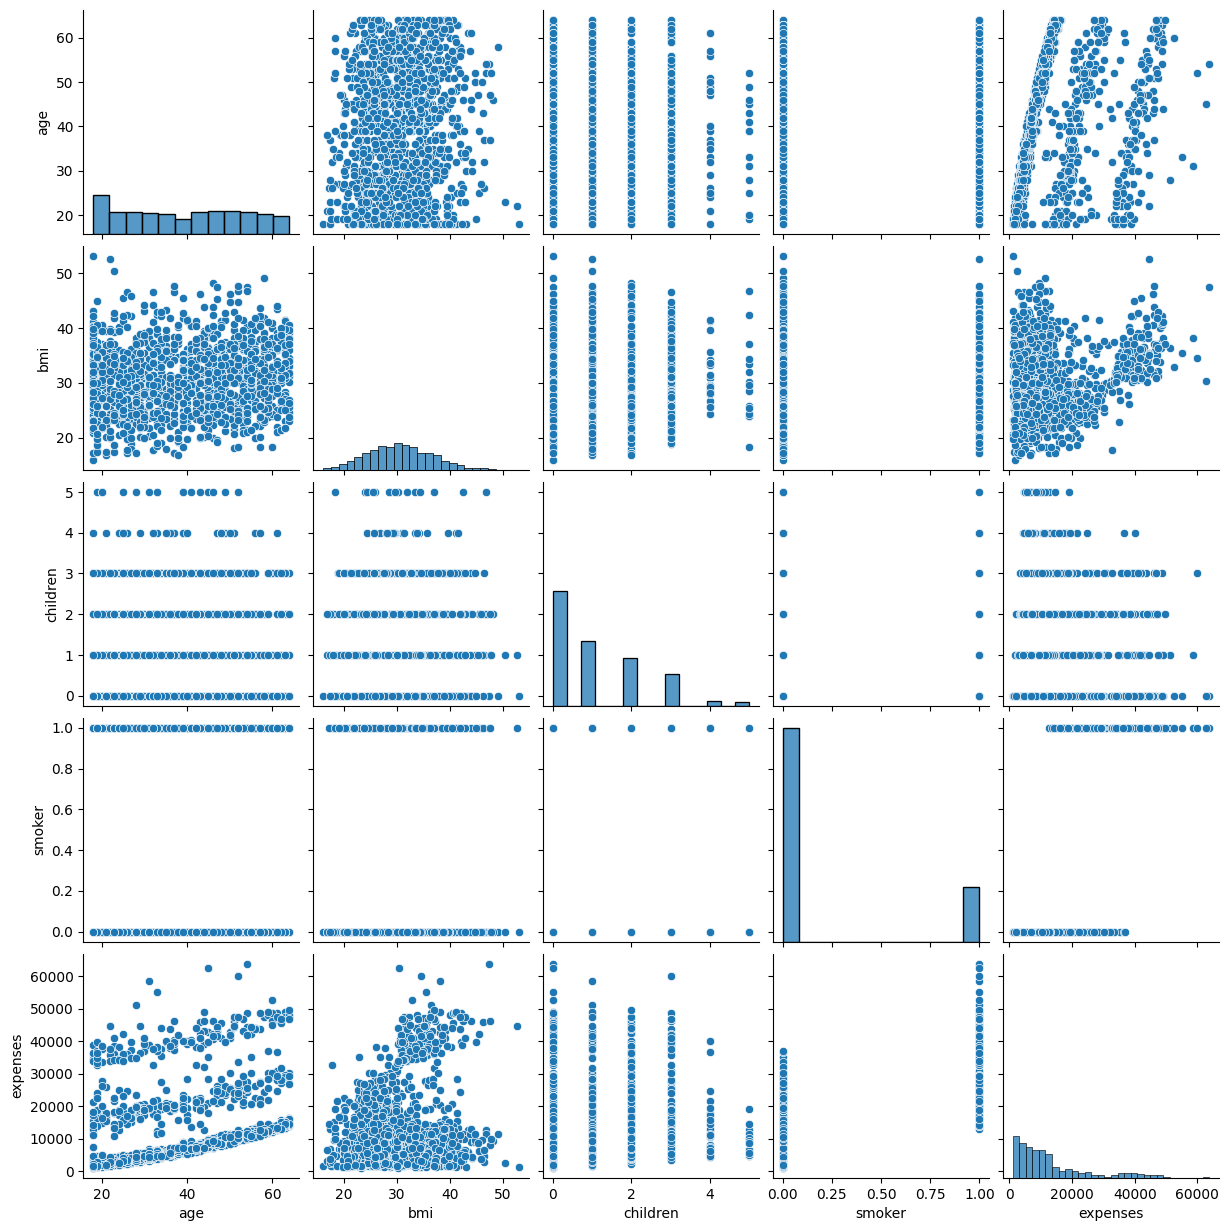

In [98]:
sns.pairplot(df)

KeyError: 'sex'

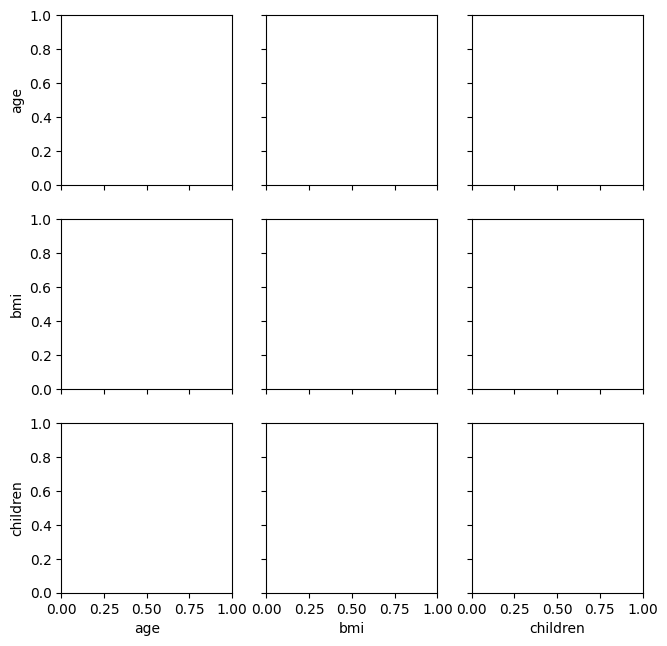

In [99]:
for category in categories:
    sns.pairplot(df[continuous], hue=category)

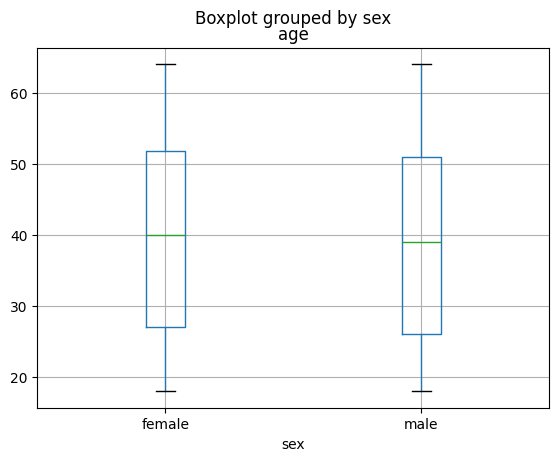

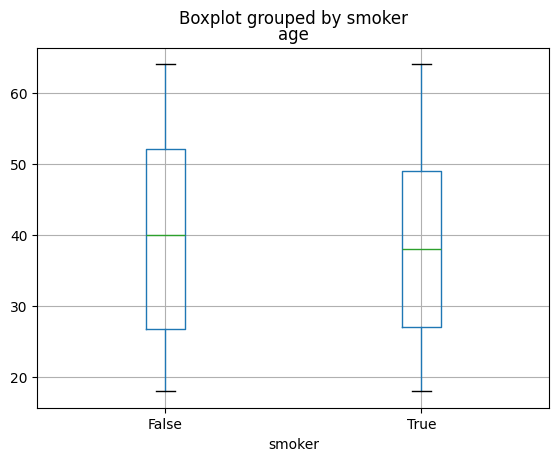

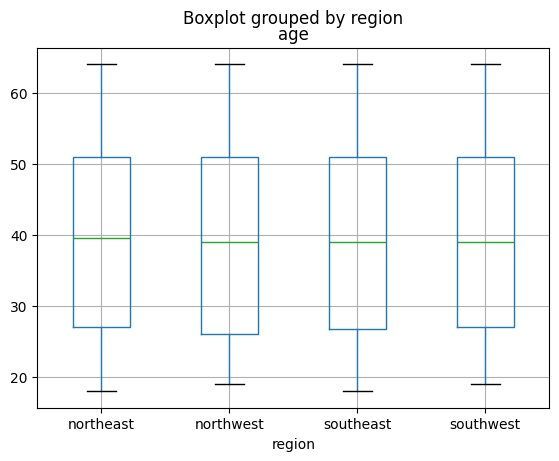

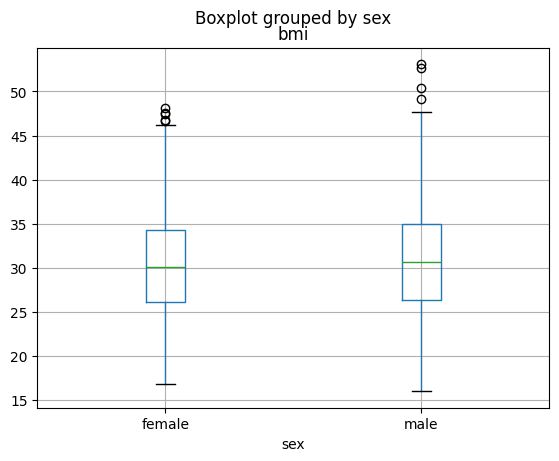

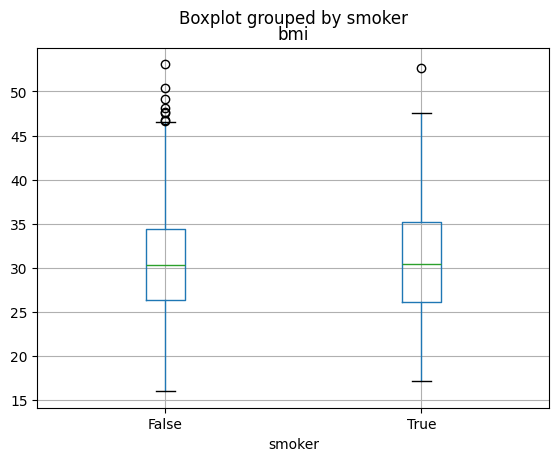

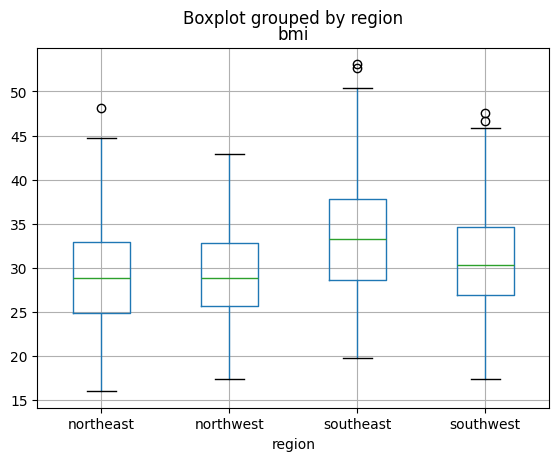

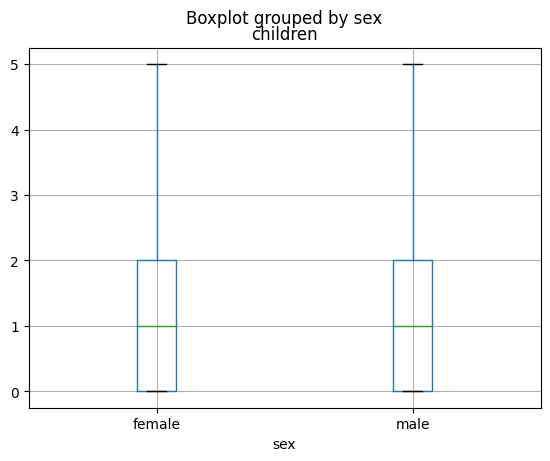

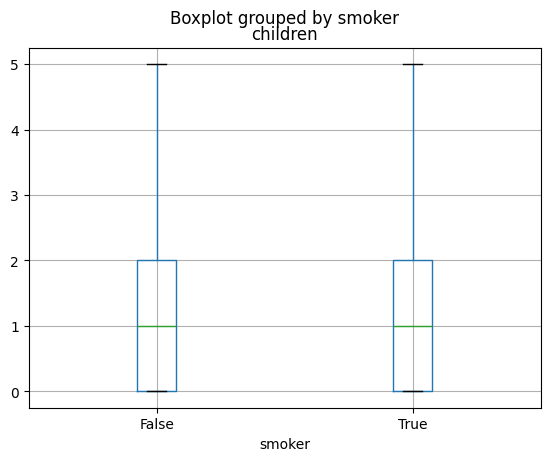

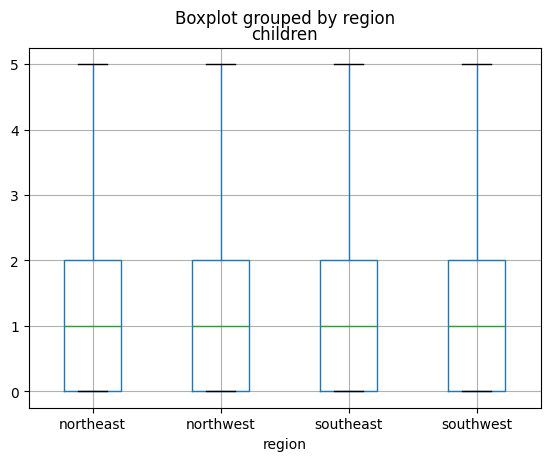

In [100]:
# plotting boxplots
for column in continuous:
    for category in categories:
        df.boxplot(column=column, by=category)